In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import json
import re

In [2]:
subject_pattern = re.compile("(K|ALS)\d{2,3}(_t\d+)?")

In [129]:
res = list()

for als in ["ALS01", "ALS02", "ALS04", "ALS05"]:
    subject = None
    metrics = None
    with open(f"/home/txdat/Documents/EEG_results/{als}_LRF0_K_final2.txt", mode="r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if line.startswith("testing on"):
                subject = subject_pattern.search(line).group()
            elif line.startswith("{'acc'"):
                if subject is not None:
                    metrics = json.loads(line.replace("'", "\""))
                    metrics["subject"] = subject
                    res.append(metrics)
                    subject = None


    subject = None
    metrics = None
    with open(f"/home/txdat/Documents/EEG_results/{als}_LRF0_K_final3.txt", mode="r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if line.startswith("testing on"):
                subject = subject_pattern.search(line).group()
            elif line.startswith("{'acc'"):
                if subject is not None:
                    metrics = json.loads(line.replace("'", "\""))
                    metrics["subject"] = subject
                    res.append(metrics)
                    subject = None
                
res = pd.DataFrame(res)
res

,acc,f1,kappa,subject
0,0.565273,0.679301,0.579017,ALS01_t1
1,0.453540,0.595760,0.372136,ALS01_t2
2,0.497476,0.591727,0.442133,ALS01_t3
3,0.478906,0.556766,0.380748,ALS01_t4
4,0.585528,0.660802,0.561603,ALS01_t5
...,...,...,...,...
78,0.371012,0.523210,0.232018,ALS05_t2
79,0.433885,0.490581,0.304525,ALS05_t3
80,0.446747,0.453634,0.260682,ALS05_t4
81,0.398083,0.429900,0.185891,ALS05_t5


In [130]:
res = res.loc[res.groupby("subject")["acc"].idxmax()][["subject", "acc", "f1", "kappa"]].reset_index(drop=True)
res = res.rename(columns={"acc": "Accuracy", "f1": "F1-score", "kappa": "Kappa score"})
res

,subject,Accuracy,F1-score,Kappa score
0,ALS01_t1,0.565273,0.679301,0.579017
1,ALS01_t10,0.604148,0.547350,0.332592
2,ALS01_t2,0.453540,0.595760,0.372136
3,ALS01_t3,0.509138,0.600817,0.460467
4,ALS01_t4,0.478906,0.556766,0.380748
5,ALS01_t5,0.608855,0.680448,0.597618
6,ALS01_t6,0.772589,0.784017,0.713896
7,ALS01_t7,0.617671,0.645479,0.529412
8,ALS01_t8,0.619987,0.642402,0.512002
9,ALS01_t9,0.541656,0.573207,0.464372


In [131]:
res["subject"] = res["subject"].apply(lambda x: x.split("_")[0])
res

,subject,Accuracy,F1-score,Kappa score
0,ALS01,0.565273,0.679301,0.579017
1,ALS01,0.604148,0.547350,0.332592
2,ALS01,0.453540,0.595760,0.372136
3,ALS01,0.509138,0.600817,0.460467
4,ALS01,0.478906,0.556766,0.380748
5,ALS01,0.608855,0.680448,0.597618
6,ALS01,0.772589,0.784017,0.713896
7,ALS01,0.617671,0.645479,0.529412
8,ALS01,0.619987,0.642402,0.512002
9,ALS01,0.541656,0.573207,0.464372


[]

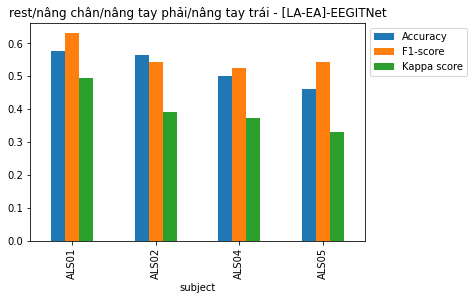

In [133]:
ax = res.groupby("subject").mean().plot.bar(y=["Accuracy", "F1-score", "Kappa score"])
ax.set_title("rest/nâng chân/nâng tay phải/nâng tay trái - [LA-EA]-EEGITNet",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

In [96]:
res["subject"] = res["subject"].apply(lambda x: x.split("_")[0])
res

,subject,Accuracy,F1-score,Kappa score
0,ALS01,0.365784,0.462255,0.251571
1,ALS01,0.440090,0.304129,0.099547
2,ALS01,0.370962,0.326207,0.139242
3,ALS01,0.522049,0.540251,0.377018
4,ALS01,0.363501,0.385162,0.166647
5,ALS01,0.472450,0.468468,0.300315
6,ALS01,0.554542,0.559282,0.403574
7,ALS01,0.382087,0.348955,0.164353
8,ALS01,0.447753,0.482527,0.274666
9,ALS01,0.697160,0.680521,0.565931


[]

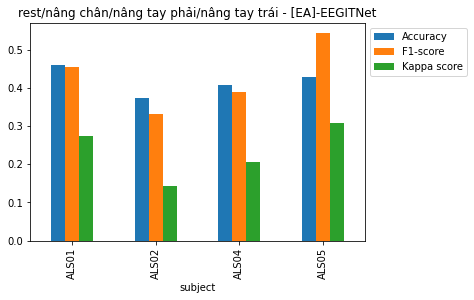

In [97]:
ax = res.groupby("subject").mean().plot.bar(y=["Accuracy", "F1-score", "Kappa score"])
ax.set_title("rest/nâng chân/nâng tay phải/nâng tay trái - [EA]-EEGITNet",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

In [33]:
print(round(res["Accuracy"].mean(), 4))
print(round(res["F1-score"].mean(), 4))
print(round(res["Kappa score"].mean(), 4))

0.4175
0.4196
0.2257


<AxesSubplot:xlabel='subject'>

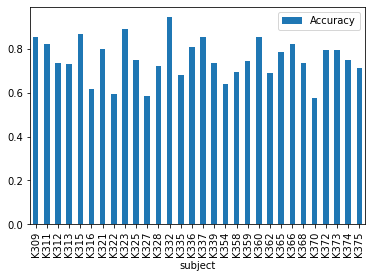

In [23]:
res.plot.bar(y="Accuracy")

In [110]:
res = list()
# subject = None
# metrics = None
with open("/home/txdat/Documents/EEG_results/EEG_ALS_nonEA_LRF0.txt", mode="r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        # if line.startswith("testing on"):
        #     subject = subject_pattern.search(line).group()
        # elif line.startswith("{'acc'"):
        #     if subject is not None:
        #         metrics = json.loads(line.replace("'", "\""))
        #         metrics["subject"] = subject
        #         res.append(metrics)
        #         subject = None
        
        if line.startswith("subject ALS"):
            # print(line)
            _, session, _, acc, f1, kappa = [x.strip() for x in line.split("-")]
            # print(nc, acc, f1, kappa)
            # print(session)
            acc = float(acc.split()[-1])
            f1 = float(f1.split()[-1])
            kappa = float(kappa.split()[-1])
            # print(acc, f1, kappa)
            session = session.split()[-1]
            
            res.append({"subject": session, "acc": acc, "f1": f1, "kappa": kappa, "ea": False})
            
with open("/home/txdat/Documents/EEG_results/EEG_ALS_EA_LRF0.txt", mode="r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        # if line.startswith("testing on"):
        #     subject = subject_pattern.search(line).group()
        # elif line.startswith("{'acc'"):
        #     if subject is not None:
        #         metrics = json.loads(line.replace("'", "\""))
        #         metrics["subject"] = subject
        #         res.append(metrics)
        #         subject = None
        
        if line.startswith("subject ALS"):
            # print(line)
            _, session, _, acc, f1, kappa = [x.strip() for x in line.split("-")]
            # print(nc, acc, f1, kappa)
            # print(session)
            acc = float(acc.split()[-1])
            f1 = float(f1.split()[-1])
            kappa = float(kappa.split()[-1])
            # print(acc, f1, kappa)
            session = session.split()[-1]
            
            res.append({"subject": session, "acc": acc, "f1": f1, "kappa": kappa, "ea": True})
            
res = pd.DataFrame(res)
res

,subject,acc,f1,kappa,ea
0,ALS01_t1,0.576814,0.685900,0.556521,False
1,ALS01_t10,0.585634,0.492235,0.282263,False
2,ALS01_t2,0.482710,0.579257,0.373791,False
3,ALS01_t3,0.527088,0.546483,0.415002,False
4,ALS01_t4,0.452155,0.457697,0.266981,False
...,...,...,...,...,...
63,ALS05_t2,0.510244,0.670725,0.423326,True
64,ALS05_t3,0.579259,0.543360,0.413889,True
65,ALS05_t4,0.506717,0.423776,0.286252,True
66,ALS05_t5,0.464282,0.497674,0.295644,True


In [111]:
res["subject"] = res["subject"].apply(lambda x: x.split("_")[0])
res

,subject,acc,f1,kappa,ea
0,ALS01,0.576814,0.685900,0.556521,False
1,ALS01,0.585634,0.492235,0.282263,False
2,ALS01,0.482710,0.579257,0.373791,False
3,ALS01,0.527088,0.546483,0.415002,False
4,ALS01,0.452155,0.457697,0.266981,False
...,...,...,...,...,...
63,ALS05,0.510244,0.670725,0.423326,True
64,ALS05,0.579259,0.543360,0.413889,True
65,ALS05,0.506717,0.423776,0.286252,True
66,ALS05,0.464282,0.497674,0.295644,True


In [112]:
res = res.groupby(["subject", "ea"]).mean().reset_index()
res = res.rename(columns={"acc": "Accuracy", "f1": "F1-score", "kappa": "Kappa score", "ea": "EA"})
res

,subject,EA,Accuracy,F1-score,Kappa score
0,ALS01,False,0.544281,0.556564,0.406782
1,ALS01,True,0.606749,0.633913,0.494591
2,ALS02,False,0.484669,0.461398,0.315988
3,ALS02,True,0.584876,0.578009,0.436597
4,ALS04,False,0.471548,0.450652,0.302598
5,ALS04,True,0.537001,0.542415,0.394695
6,ALS05,False,0.533534,0.589677,0.400873
7,ALS05,True,0.531646,0.585570,0.397722


In [113]:
# res = res.apply(lambda r: r["subject"] = r["subject"] + ' - EA' if r["EA"] else '', axis=0)
# res

for i, r in res.iterrows():
    if r["EA"]:
        res.loc[i, "subject"] = r["subject"] + ' - EA'

[]

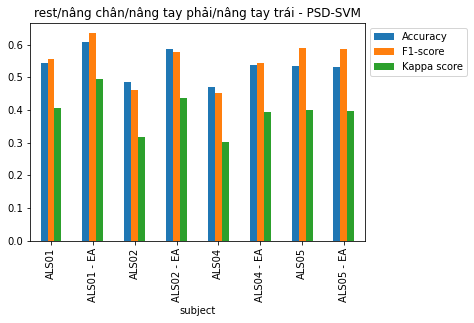

In [115]:
ax = res.groupby("subject").mean().plot.bar(y=["Accuracy", "F1-score", "Kappa score"])
ax.set_title("rest/nâng chân/nâng tay phải/nâng tay trái - PSD-SVM",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

In [144]:
res = list()
subject = None
with open("/home/txdat/Documents/EEG_results/EEG_K_nonEA_SVM_LRF0.txt", mode="r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if line.startswith("subject"):
            # print(line)
            subject = line.split()[-1]
        elif line.startswith("n_components"):
            _, acc, f1, kappa = [x.strip() for x in line.split("-")]
            acc = float(acc.split()[-1])
            f1 = float(f1.split()[-1])
            kappa = float(kappa.split()[-1])
            res.append((subject, acc, f1, kappa))
            
res = pd.DataFrame(res, columns=["subject", "acc", "f1", "kappa"])
res

,subject,acc,f1,kappa
0,K313,0.487051,0.665135,0.451895
1,K312,0.468371,0.607230,0.394040
2,K309,0.526737,0.710619,0.494352
3,K311,0.753823,0.865665,0.756686
4,K315,0.570231,0.762086,0.564807
5,K322,0.506377,0.660782,0.468442
6,K316,0.430526,0.599337,0.305693
7,K325,0.475962,0.574873,0.444003
8,K321,0.606586,0.607225,0.444370
9,K323,0.576209,0.648988,0.504116


In [145]:
res.mean()

/tmp/ipykernel_338919/2084554795.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  res.mean()


acc      0.551747
f1       0.672468
kappa    0.505351
dtype: float64

In [ ]:
# nonEA - 3c
# acc      0.693820
# f1       0.732977
# kappa    0.588193

# EA - 3c
# acc      0.755744
# f1       0.786804
# kappa    0.657233

# nonEA - 4c
# acc      0.551747
# f1       0.672468
# kappa    0.505351

# EA - 4c
# acc      0.625338
# f1       0.705636
# kappa    0.568795

In [141]:
res = [
    ("[EA]-EEGITNet", True, 0.7520, 0.7899, 0.6550),
    ("[EA]-PSD-SVM", True, 0.755744, 0.786804, 0.657233),
    ("PSD-SVM", False, 0.693820, 0.732977, 0.588193),
]

res = pd.DataFrame(res, columns=["Method", "EA", "Accuracy", "F1-score", "Kappa score"])
res

,Method,EA,Accuracy,F1-score,Kappa score
0,[EA]-EEGITNet,True,0.752000,0.789900,0.655000
1,[EA]-PSD-SVM,True,0.755744,0.786804,0.657233
2,PSD-SVM,False,0.693820,0.732977,0.588193


[]

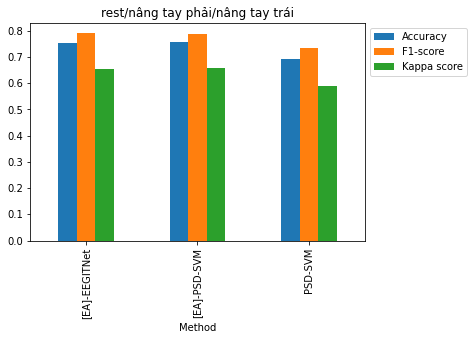

In [143]:
ax = res.set_index("Method").plot.bar(y=["Accuracy", "F1-score", "Kappa score"])
ax.set_title("rest/nâng tay phải/nâng tay trái",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

In [146]:
res = [
    ("[EA]-EEGITNet", True, 0.6204, 0.7077, 0.5479),
    ("[EA]-PSD-SVM", True, 0.625338, 0.705636, 0.568795),
    ("PSD-SVM", False, 0.551747, 0.672468, 0.505351),
]

res = pd.DataFrame(res, columns=["Method", "EA", "Accuracy", "F1-score", "Kappa score"])
res

,Method,EA,Accuracy,F1-score,Kappa score
0,[EA]-EEGITNet,True,0.620400,0.707700,0.547900
1,[EA]-PSD-SVM,True,0.625338,0.705636,0.568795
2,PSD-SVM,False,0.551747,0.672468,0.505351


[]

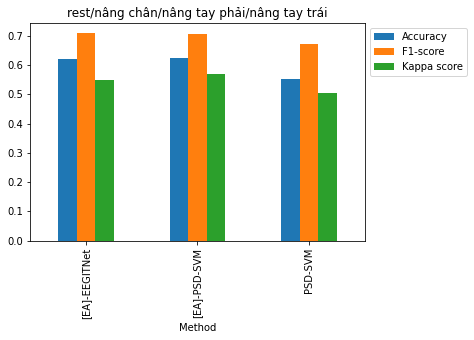

In [147]:
ax = res.set_index("Method").plot.bar(y=["Accuracy", "F1-score", "Kappa score"])
ax.set_title("rest/nâng chân/nâng tay phải/nâng tay trái",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()